Deze afbeeldingen zijn uiteindelijk niet gebruikt, omdat coruptie tijdens de traing zelf is toegepast. Input is dus niet nodig.

In [ ]:
import os
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from sklearn.utils import shuffle
import albumentations as A
import matplotlib.pyplot as plt

c:\Users\lenka\anaconda3\envs\TataSteel2\lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# Witte vlekken toevoegen

In [6]:
import numpy as np
import cv2

def add_freely_growing_connected_blobs(images, num_blobs_range=(1, 3), blob_size_range=(8, 15), growth_steps=3, step_size_range=(5, 8)):
    augmented_images = []
    
    for img in images:
        img = img.copy()

        if img.ndim == 3:
            img = img[..., 0]

        _, binary = cv2.threshold((img * 255).astype(np.uint8), 30, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours) == 0:
            augmented_images.append(img)
            continue
        
        cnt = max(contours, key=cv2.contourArea)
        h, w = img.shape
        num_blobs = np.random.randint(num_blobs_range[0], num_blobs_range[1] + 1)

        for _ in range(num_blobs):
            point_idx = np.random.randint(0, len(cnt))
            point = cnt[point_idx][0]

            blob_width = np.random.randint(blob_size_range[0], blob_size_range[1])
            blob_height = np.random.randint(blob_size_range[0] // 2, blob_size_range[1] // 2)

            center = (point[0], point[1])

            for step in range(growth_steps):
                axes = (blob_width // 2, blob_height // 2)
                angle = np.random.randint(0, 360)
                cv2.ellipse(img, center, axes, angle, 0, 360, (1.0,), thickness=-1)

                # Kies nieuwe random richting
                grow_direction = np.random.uniform(-np.pi, np.pi)
                step_size = np.random.randint(step_size_range[0], step_size_range[1])

                dx = int(step_size * np.cos(grow_direction))
                dy = int(step_size * np.sin(grow_direction))

                new_center = (np.clip(center[0] + dx, 0, w - 1), np.clip(center[1] + dy, 0, h - 1))

                # Vul de ruimte tussen oude center en nieuwe center
                num_interp = int(np.hypot(new_center[0] - center[0], new_center[1] - center[1])) // 2
                for t in np.linspace(0, 1, num_interp):
                    interp_x = int((1 - t) * center[0] + t * new_center[0])
                    interp_y = int((1 - t) * center[1] + t * new_center[1])
                    cv2.circle(img, (interp_x, interp_y), radius=blob_width//4, color=(1.0,), thickness=-1)

                center = new_center

        augmented_images.append(img)

    return np.array(augmented_images)


In [7]:
# Stel: je hebt je 'train_targets' geladen
train_inputs = add_freely_growing_connected_blobs(train_targets)
val_inputs = add_freely_growing_connected_blobs(val_targets)
test_inputs = add_freely_growing_connected_blobs(test_targets)


In [8]:
# Binariseer inputs en targets
train_inputs = binarize_images(train_inputs)
train_targets = binarize_images(train_targets)

val_inputs = binarize_images(val_inputs)
val_targets = binarize_images(val_targets)

test_inputs = binarize_images(test_inputs)
test_targets = binarize_images(test_targets)


NameError: name 'binarize_images' is not defined

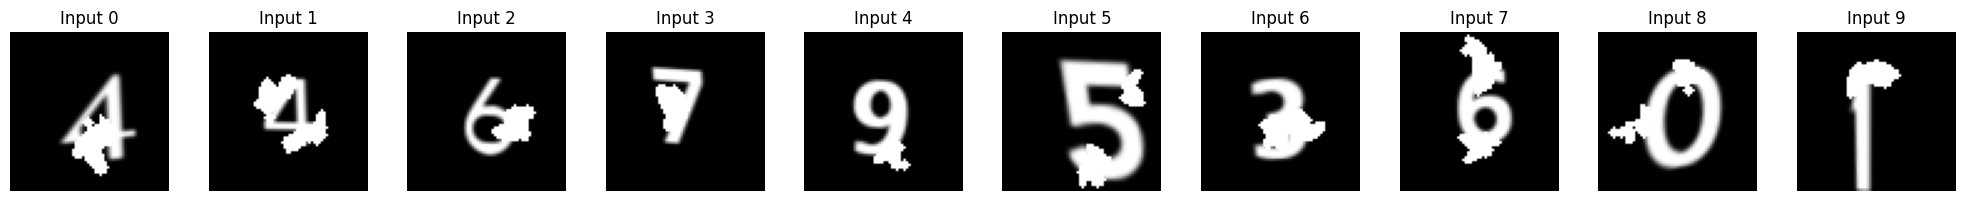

In [ ]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20, 2)) 

# Loop door 10 input-afbeeldingen
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(train_inputs[i].squeeze(), cmap='gray')  
    plt.title(f"Input {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Zwarte vlekken

In [ ]:
import numpy as np
import cv2

def add_variable_black_damage(images):
    augmented_images = []

    for img in images:
        img = img.copy()

        if img.ndim == 3:
            img = img[..., 0]

        _, binary = cv2.threshold((img * 255).astype(np.uint8), 30, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if len(contours) == 0:
            augmented_images.append(img)
            continue

        cnt = max(contours, key=cv2.contourArea)
        h, w = img.shape

        # Kies random verstoringsniveau
        damage_level = np.random.choice(['low', 'medium', 'high'], p=[0.1, 0.7, 0.2])
        if damage_level == 'medium':
            num_blobs_range = (2, 4)
            blob_size_range = (5, 12)
            growth_steps = 3
            step_size_range = (2, 6)
        else:  # high damage
            num_blobs_range = (1,1)
            blob_size_range = (12, 18)
            growth_steps = 8
            step_size_range = (5, 8)

        num_blobs = np.random.randint(num_blobs_range[0], num_blobs_range[1] + 1)

        for _ in range(num_blobs):
            point_idx = np.random.randint(0, len(cnt))
            point = cnt[point_idx][0]

            blob_width = np.random.randint(blob_size_range[0], blob_size_range[1])
            blob_height = np.random.randint(blob_size_range[0] // 2, blob_size_range[1] // 2)

            center = (point[0], point[1])

            for step in range(growth_steps):
                axes = (blob_width // 2, blob_height // 2)
                angle = np.random.randint(0, 360)
                cv2.ellipse(img, center, axes, angle, 0, 360, (0.0,), thickness=-1)

                grow_direction = np.random.uniform(-np.pi, np.pi)
                step_size = np.random.randint(step_size_range[0], step_size_range[1])

                dx = int(step_size * np.cos(grow_direction))
                dy = int(step_size * np.sin(grow_direction))

                new_center = (np.clip(center[0] + dx, 0, w - 1), np.clip(center[1] + dy, 0, h - 1))

                distance = np.hypot(new_center[0] - center[0], new_center[1] - center[1])
                num_interp = int(distance) // 2

                if num_interp > 0:
                    for t in np.linspace(0, 1, num_interp):
                        interp_x = int((1 - t) * center[0] + t * new_center[0])
                        interp_y = int((1 - t) * center[1] + t * new_center[1])
                        cv2.circle(img, (interp_x, interp_y), radius=blob_width//4, color=(0.0,), thickness=-1)

                center = new_center

        augmented_images.append(img)

    return np.array(augmented_images)


In [11]:
# Stel: je hebt je 'train_targets' geladen
train_inputs = add_variable_black_damage(train_targets)
val_inputs = add_variable_black_damage(val_targets)
test_inputs = add_variable_black_damage(test_targets)
# Binariseer inputs en targets
train_inputs = binarize_images(train_inputs)
train_targets = binarize_images(train_targets)

val_inputs = binarize_images(val_inputs)
val_targets = binarize_images(val_targets)

test_inputs = binarize_images(test_inputs)
test_targets = binarize_images(test_targets)


NameError: name 'binarize_images' is not defined

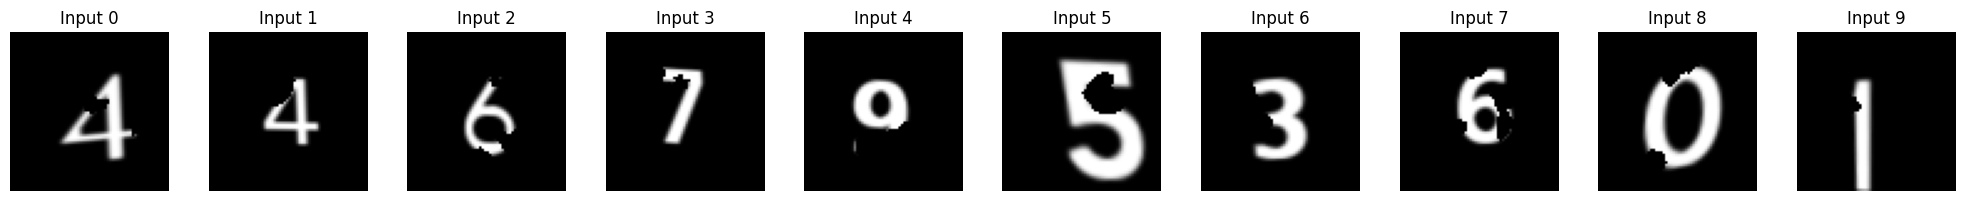

In [ ]:
import matplotlib.pyplot as plt
n = 10

plt.figure(figsize=(20, 2)) 

# Loop door 10 input-afbeeldingen
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(train_inputs[i].squeeze(), cmap='gray') 
    plt.title(f"Input {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Combineren

In [13]:
def augment_image(img):
    choice = np.random.choice(['white', 'black', 'both'])

    if choice == 'white':
        img_aug = add_freely_growing_connected_blobs([img])[0]
    elif choice == 'black':
        img_aug = add_variable_black_damage([img])[0]
    else:  # both
        img_white = add_freely_growing_connected_blobs([img])[0]
        img_aug = add_variable_black_damage([img_white])[0]
    
    return img_aug


In [14]:
# Stel je hebt X_train_orig, X_val_orig, X_test_orig

train_inputs = np.array([augment_image(img) for img in X_train_orig])
val_inputs = np.array([augment_image(img) for img in X_val_orig])
test_inputs = np.array([augment_image(img) for img in X_test_orig])

# Opslaan
np.save('train_inputs_augmented.npy', train_inputs)
np.save('val_inputs_augmented.npy', val_inputs)
np.save('test_inputs_augmented.npy', test_inputs)



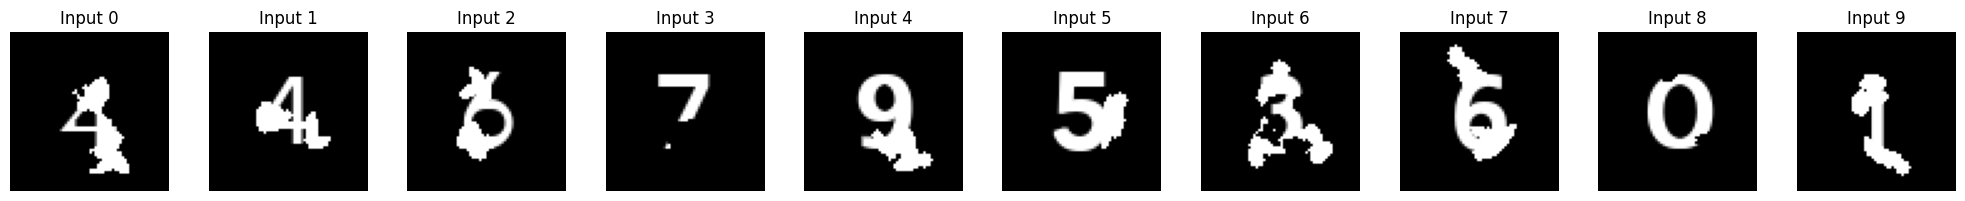

In [15]:
import matplotlib.pyplot as plt

# Stel aantal plaatjes in
n = 10

# Maak een figure
plt.figure(figsize=(20, 2))  # Groot genoeg voor 10 plaatjes naast elkaar

# Loop door 10 input-afbeeldingen
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(train_inputs[i].squeeze(), cmap='gray')  # <-- LET OP: nu train_inputs
    plt.title(f"Input {i}")
    plt.axis('off')

# Zorg dat alles netjes naast elkaar staat
plt.tight_layout()
plt.show()
